In [26]:
# STANDARD IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# DATA PREP
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline


# MODELS:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

# METRICS & VISUALIZATIONS
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree




# DO WE USE THESE????
from nltk.corpus import stopwords
import re

In [4]:
reddit =pd.read_csv('../data/reddit_clean.csv')
print(reddit.shape)
reddit.head(2)

(10511, 2)


,subreddit,title
0,TheOnion,Idiot Tornado Tears Harmlessly Through Empty F...
1,TheOnion,New Texas Law Requires Schools To Display Imag...


In [5]:
reddit['subreddit'].value_counts(normalize=True)

TheOnion     0.516316
worldnews    0.483684
Name: subreddit, dtype: float64

In [6]:
X = reddit['title']
y = reddit['subreddit']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
bag_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('bag', BaggingClassifier())
])

In [10]:
bag_pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()), ('bag', BaggingClassifier())])

In [11]:
bag_pipe.score(X_train, y_train)

0.984895337773549

In [12]:
bag_pipe.score(X_test, y_test)

0.8311935330480267

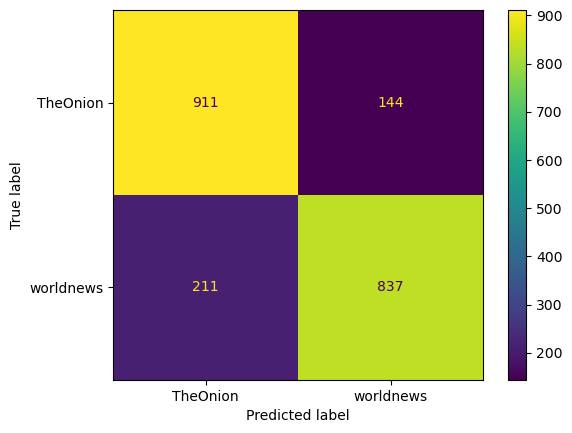

In [15]:
ConfusionMatrixDisplay.from_estimator(bag_pipe, X_test, y_test)

In [19]:
preds = bag_pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [29]:
tree_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('tree', DecisionTreeClassifier())
])

In [30]:
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()),
                ('tree', DecisionTreeClassifier())])

In [31]:
tree_pipe.score(X_train, y_train)

1.0

In [32]:
tree_pipe.score(X_test, y_test)

0.8097955301949595

In [38]:
tree_pipe[1]

DecisionTreeClassifier()

[Text(0.9822313278250692, 0.9983974358974359, 'ukraine <= 0.5\ngini = 0.499\nsamples = 8408\nvalue = [4372, 4036]'),
 Text(0.9710810624274613, 0.9951923076923077, 'china <= 0.5\ngini = 0.495\nsamples = 7925\nvalue = [4360, 3565]'),
 Text(0.9587081417982297, 0.9919871794871795, 'russia <= 0.5\ngini = 0.49\nsamples = 7594\nvalue = [4344, 3250]'),
 Text(0.9422353090114203, 0.9887820512820513, 'russian <= 0.5\ngini = 0.485\nsamples = 7382\nvalue = [4337, 3045]'),
 Text(0.9175626519094549, 0.9855769230769231, 'in <= 0.5\ngini = 0.48\nsamples = 7196\nvalue = [4326, 2870]'),
 Text(0.8887673614833542, 0.9823717948717948, 'us <= 0.5\ngini = 0.457\nsamples = 5591\nvalue = [3618, 1973]'),
 Text(0.879732230743104, 0.9791666666666666, 'sudan <= 0.5\ngini = 0.448\nsamples = 5446\nvalue = [3600, 1846]'),
 Text(0.8780776290487733, 0.9759615384615384, 'india <= 0.5\ngini = 0.443\nsamples = 5383\nvalue = [3600, 1783]'),
 Text(0.8699349777342573, 0.9727564102564102, 'israel <= 0.5\ngini = 0.437\nsamples 

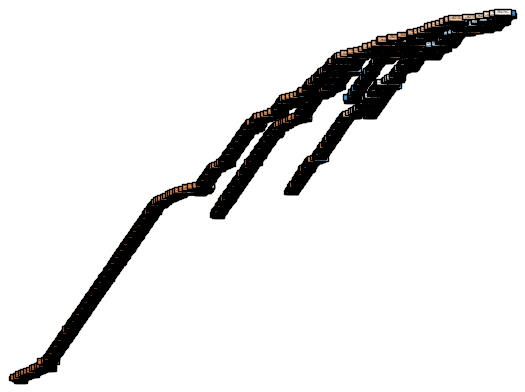

In [43]:

plot_tree(tree_pipe[1], feature_names=tree_pipe[0].get_feature_names_out(), filled = True)